# Day 3 Tutorial: Titanic
Welcome to Day 3 of the SPAI Advanced Machine Learning Workshop. In this tutorial notebook, the objective is to utilise the various hyperparameter tuning functions, feature selection and feature engineering.

## Dataset
This dataset is originally from Vanderbilet University's Department of Biostatistics, sourced from their [website](https://biostat.app.vumc.org/wiki/Main/DataSets). The objective of the dataset is to predict whether or not a person survives in the titanic based on the information provided inthe dataset.

| Features | Descriptions |
| :--      | :---         |
| pclass | Refers to passenger class (1st, 2nd, 3rd) and is a proxy for socio-economic class. |
| survived | 0: Did not survive. 1: Survived.|
| age | In years, and some infants have fractional values. |
| sibsp | Number of Siblings/Spouses aboard. |
| parch | Number of Parents/Children aboard. |
| fare | Passenger Fare (British Pound) |
| sex_male | Sex |
| embarked_Q | Embarked from Queenstown's Port. |
| embarked_S | Embarked from Southampton's Port. |

# Objective
**Can you build a machine learning model to accurately predict whether or not the passenger survives in the Titanic?**

## ⚙ *Basic Initialization*
Please do not make any changes to this section.   
This section is required for the demo to work and not running it would result in errors 🚨.   
However, if you would like to understand the code, feel free to do so 😊

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time as t

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score

# Makes font size larger
plt.rcParams.update({'font.size': 16})

## Data Injestion

Let us begin the journey by first importing the data from the `.csv` file from the institute's website. For the sake of this exercise, the dataset have been uploaded to the Github Repository and is accessible via the link below.

Churn for Bank Customers Link : 
```
https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/titanic_cleaned.csv
```

In [ ]:
# Import .csv as a DataFrame using pandas .read_csv function
link = 'https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/titanic_cleaned.csv'
titanic = pd.read_csv(link, index_col=0)

## Data Partition

Before splitting the dataset into training and testing sets, first partition the titanic dataset's target variable, ```survived```, and assign the variable ```y``` to it. The remaining dataset should be assigned to the variable ```X```. Split the training and testing sets in a standard 8:2 ratio, setting aside 20% of the data for testing. 

In [ ]:
# Defining features and target variables respectively
X, y = titanic.drop(columns=['survived']), titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Exercise 1️⃣

## Testing Models' Performance

We will be testing different models and see how they perform with the given task. This is what is called the baseline model. A baseline model acts like a "control set" in science experiments.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier

models = {
    'Dummy Classifier': DummyClassifier(strategy='uniform'),
    'Logistic Regression': LogisticRegression(n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Extra Tre': ExtraTreesClassifier(n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(),
}

In [ ]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'f1']

scores = {
    'model': [],
    'train accuracy': [],
    'test accuracy': [],
    'train f1': [],
    'test f1': [],
    'fit_time': [],
}

for key in models.keys():
    results = cross_validate(models[key], X_train, y_train, cv=5, 
        scoring=scoring, return_train_score=True, n_jobs=-1)

    scores['model'].append(key)
    scores['train accuracy'].append(np.mean(results['train_accuracy']))
    scores['test accuracy'].append(np.mean(results['test_accuracy']))
    scores['train f1'].append(np.mean(results['train_f1']))
    scores['test f1'].append(np.mean(results['train_f1']))
    scores['fit_time'].append(np.mean(results['fit_time']))

pd.DataFrame(scores)

---

## Exercise 2️⃣
We will be testing both grid search and randomized search cv

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
knn = KNeighborsClassifier()
knn.get_params()

In [ ]:
params = {
    'n_neighbors': range(2, 8), # [2,3,4,5,6,7]
    'p' : range(1, 8), # [1,2,3,4,5,6,7]
    'leaf_size' : range(20, 45, 5) # [20,25,30,35,40]
}

### Grid Search CV

In [ ]:
result = GridSearchCV(knn, params, cv=5, n_jobs=-1).fit(X_train, y_train)

print('Best Score is:', result.best_score_)
print('Best Parameters:\n', result.best_params_)

In [ ]:
pd.DataFrame(result.cv_results_).sort_values('mean_test_score', ascending=False).head()

In [ ]:
best_param = result.best_params_

In [ ]:
scoring = ['accuracy', 'f1']
model = KNeighborsClassifier(**best_param)

result = cross_validate(model, X_train, y_train, cv=5, n_jobs=-1, scoring=scoring)

pd.DataFrame(result).mean()

### Random Search CV

In [ ]:
result = RandomizedSearchCV(knn, params, cv=5, n_jobs=-1).fit(X_train, y_train)

print('Best Score is:', result.best_score_)
print('Best Parameters:\n', result.best_params_)

In [ ]:
pd.DataFrame(result.cv_results_).sort_values('mean_test_score', ascending=False).head()

In [ ]:
best_param = result.best_params_

In [ ]:
scoring = ['accuracy', 'f1']
model = KNeighborsClassifier(**best_param)

result = cross_validate(model, X_train, y_train, cv=5, n_jobs=-1, scoring=scoring)

pd.DataFrame(result).mean()

---

## Exercise 3️⃣
In this example we will go through feature importance and coefficient

### Feature Importance

In [ ]:
model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7790697674418605

In [ ]:
pd.DataFrame({
    'columns': X_train.columns,
    'feature importance': model.feature_importances_
}).sort_values('feature importance', ascending=False)

,columns,feature importance
4,fare,0.358288
1,age,0.267912
5,sex_male,0.265946
0,pclass,0.055310
7,embarked_S,0.021962
6,embarked_Q,0.015398
2,sibsp,0.015184
3,parch,0.000000


In [ ]:
X_new = X.drop(columns=['embarked_Q', 'parch'])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2)

model = DecisionTreeClassifier().fit(X_train_new, y_train_new)
y_pred = model.predict(X_test_new)
accuracy_score(y_test, y_pred)

0.5581395348837209

### Coefficients

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.813953488372093

In [ ]:
result = pd.DataFrame({
    'columns': X_train.columns,
    'coef': model.coef_[0]
}).sort_values('coef', ascending=False)

result

,columns,coef
4,fare,1.263604
3,parch,0.000793
1,age,-0.039623
2,sibsp,-0.268411
6,embarked_Q,-0.371966
0,pclass,-0.464363
7,embarked_S,-0.566875
5,sex_male,-2.343031


[]

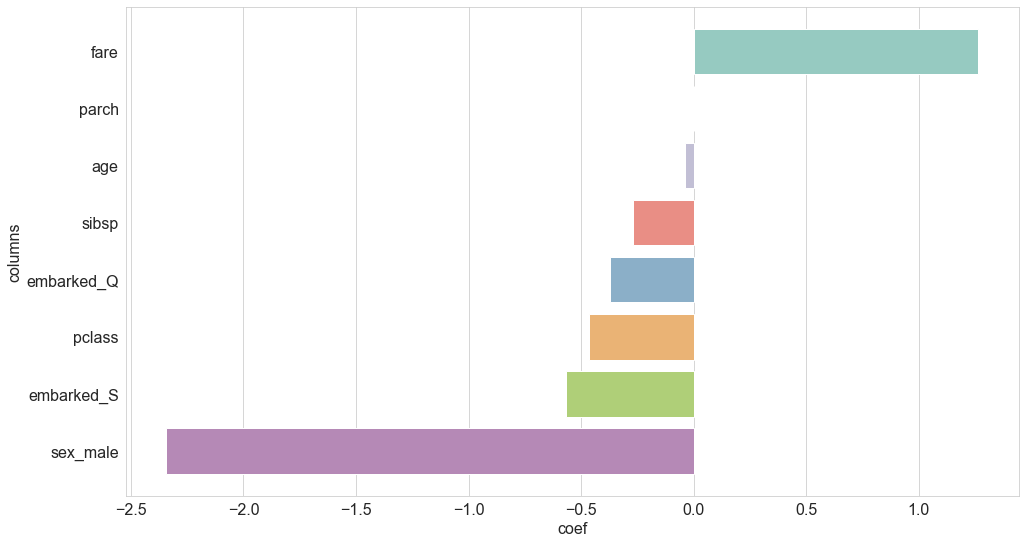

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))

sns.barplot(data=result, y='columns', x='coef')

plt.plot()

---

## Exercise 4️⃣
In this example, we will be going through recursive feature extraction cross validation.

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
dt = DecisionTreeClassifier()
result = RFECV(dt, cv=5, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)

In [ ]:
pd.DataFrame({
    'columns': X_train.columns,
    'ranking': result.ranking_
}).sort_values('ranking')

,columns,ranking
0,pclass,1
1,age,1
2,sibsp,1
4,fare,1
5,sex_male,1
7,embarked_S,1
6,embarked_Q,2
3,parch,3


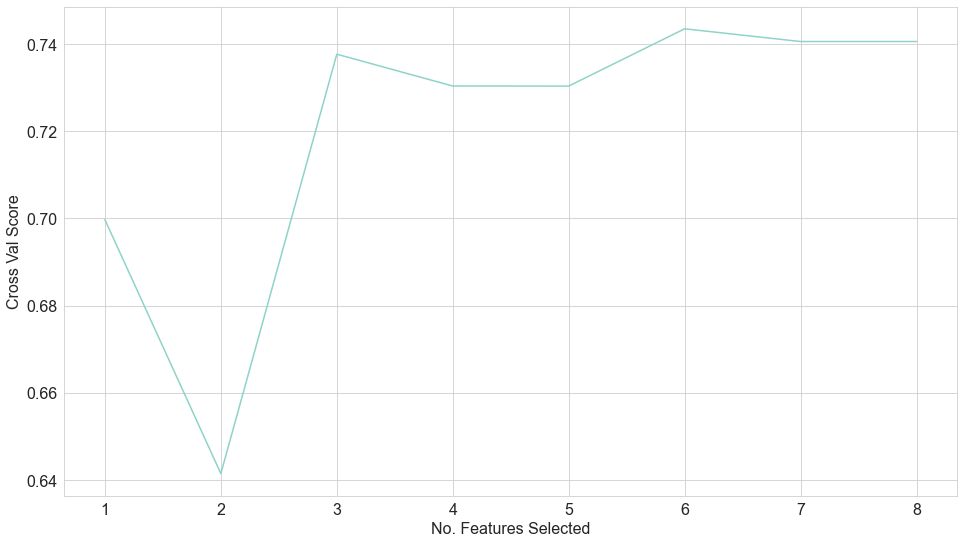

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})

plt.plot(np.arange(1, len(X_train.columns) + 1), result.grid_scores_)
plt.ylabel('Cross Val Score')
plt.xlabel('No. Features Selected')

plt.show()

In [ ]:
X_new = X.drop(columns=['sibsp', 'parch'])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2)

model = DecisionTreeClassifier().fit(X_train_new, y_train_new)
y_pred = model.predict(X_test_new)
accuracy_score(y_test, y_pred)

---

## Exercise 5️⃣
We will be show casing some feature engineering

In [ ]:
link = 'https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/HousingDataset.csv'
house = pd.read_csv(link)

house.drop(columns=['Remaining Lease Duration'], inplace=True)

### Feature Engineering based on Observations

In [ ]:
house['Month of Resale'].head()

0    Mon,01 May 17
1    Mon,01 May 17
2    Thu,01 Jun 17
3    Tue,01 Aug 17
4    Tue,01 Aug 17
Name: Month of Resale, dtype: object

In [ ]:
house['Month of Resale'] = pd.to_datetime(house['Month of Resale'])
house['Month of Resale'].head()

0   2017-05-01
1   2017-05-01
2   2017-06-01
3   2017-08-01
4   2017-08-01
Name: Month of Resale, dtype: datetime64[ns]

In [ ]:
temp = house.copy()

In [ ]:
temp_month

,Floor Area (sqm),Resale Price
Month of Resale,,
2012-03-01,100.0,435000.0
2012-04-01,99.0,436000.0
2012-05-01,98.0,440000.0
2012-06-01,100.0,443000.0
2012-07-01,100.0,442500.0
...,...,...
2019-02-01,95.0,393000.0
2019-03-01,94.0,400000.0
2019-04-01,94.0,400000.0


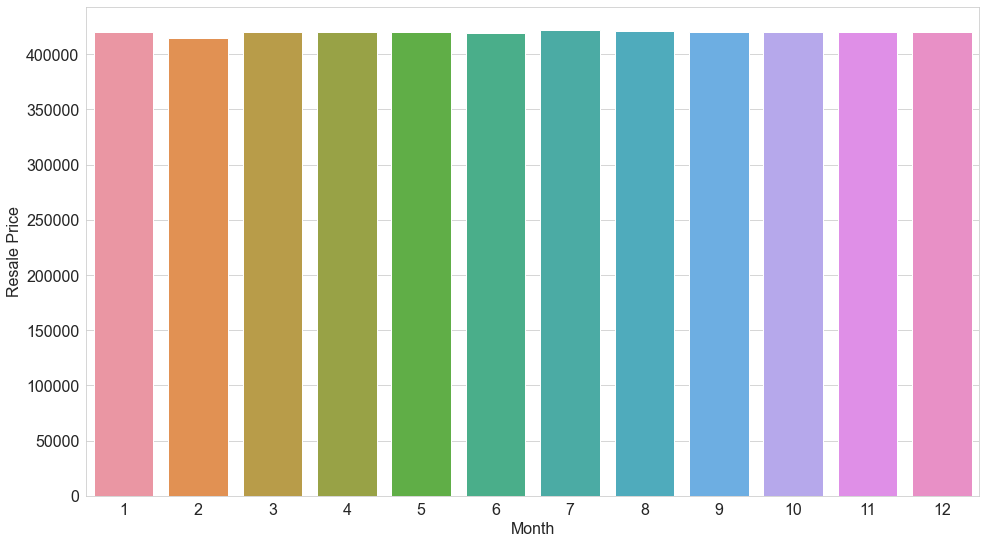

In [ ]:
house['Month'] = house['Month of Resale'].dt.month
temp_month = house.groupby(by='Month').median()

plt.figure(figsize=(16, 9))
sns.barplot(data=temp_month, x=temp_month.index, y='Resale Price')
plt.show()

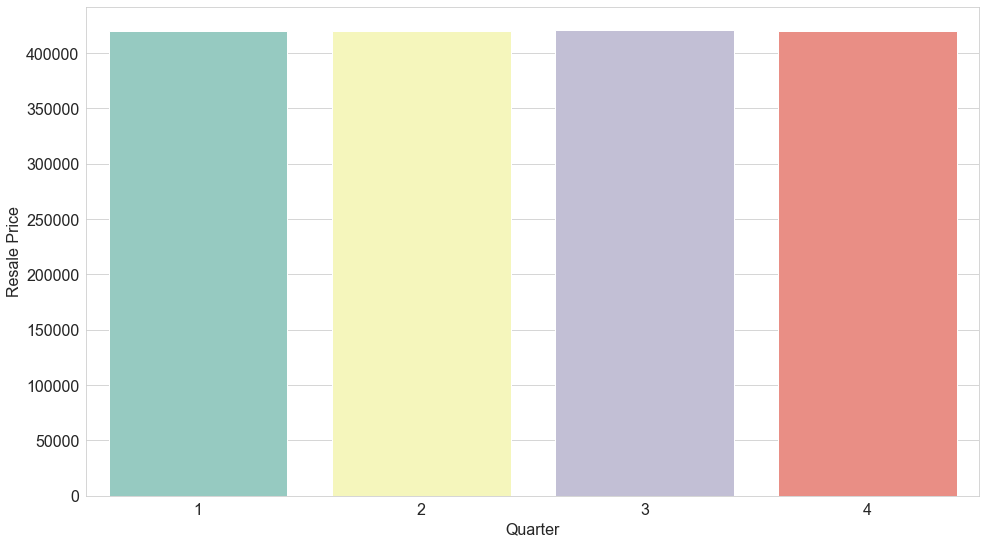

In [ ]:
house['Quarter'] = house['Month of Resale'].dt.quarter
temp_quarter = house.groupby(by='Quarter').median()

plt.figure(figsize=(16, 9))
sns.barplot(data=temp_quarter, x=temp_quarter.index, y='Resale Price')
plt.show()

### Feature Engineering based on Research

In [ ]:
# classify the town name by region
central = ['MARINA BAY', 'MARINA CENTRE', 'RAFFLES PLACE', 'TANJONG PAGAR', 'OUTRAM', 'SENTOSA', 'ROCHER', 'ORCHAD', 'NEWTON', 'RIVER VALLEY', 'BUKIT TIMAH', 'HOLLAND VILLAGE', 'TANGLIN', 'NOVENA', 'THOMSON', 'CENTRAL AREA', 'BISHAN', 'BUKIT MERAH', 'GEYLANG', 'KALLANG', 'MARINE PARADE', 'QUEENSTOWN', 'SOUTHERN ISLANDS', 'TOA PAYOH']

North = ['CENTRAL WATER CATCHMENT', 'LIM CHU KANG', 'MANDAI', 'SEMBAWANG', 'SIMPANG', 'SUNGEI KADUT', 'WOODLANDS', 'YISHUN']

North_east = ['ANG MO KIO', 'HOUGANG', 'NORTH-EASTERN ISLANDS', 'PUNGGOL', 'SELETAR', 'SENGKANG', 'SERANGOON']

East = ['BEDOK', 'CHANGI', 'CHANGI BAY', 'PAYA LEBAR', 'PASIR RIS', 'TAMPINES']

West = ['BUKIT BATOK', 'BUKIT PANJANG', 'BOON LAY', 'PIONEER', 'CHOA CHU KANG', 'CLEMENTI', 'JURONG EAST', 'JURONG WEST', 'TENGAH', 'TUAS', 'WESTERN ISLANDS', 'WESTERN WATER CATCHMENT', 'BENOI', 'GHIM MOH', 'GUL', 'PANDAN GARDENS', 'JURONG ISLAND', 'KENT RIDGE', 'NANYANG', 'PIONEER', 'PASIR LABA', 'TEBAN GARDENS', 'TOH TUCK', 'TUAS SOUTH', 'WEST COAST']

In [ ]:
# create a function to add the region name
def create_region(town):
        if town in central:
            return "Central"
        elif  town in North_east:
            return "North-East"
        elif town in East :
            return "East"
        elif town in North :
            return "North"
        elif town in West :
            return "West"

house['Regions'] = house['Town'].apply(create_region)
house['Regions'].value_counts()

West          34636
North-East    32948
Central       27284
North         23827
East          22939
Name: Regions, dtype: int64

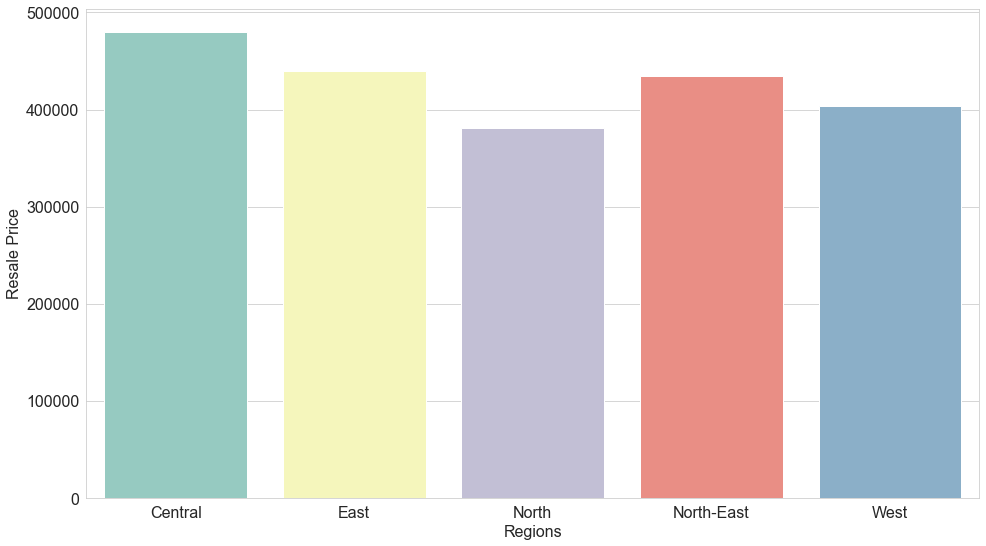

In [ ]:
temp_region = house.groupby(by='Regions').median()

plt.figure(figsize=(16, 9))
sns.barplot(data=temp_region, x=temp_region.index, y='Resale Price')
plt.show()

---

## Exercise 6️⃣
In this example, we will learn how to save ML models and use them.

In [ ]:
import joblib

In [ ]:
# Model Training
model = KNeighborsClassifier().fit(x_train, y_train)

# Saves the model
joblib.dump(model, 'knn_trained.pkl')

# Reset model to nothing
model = None # not necessary but to proof model is saved

In [ ]:
# Load the model from the file
model = joblib.load('knn_trained.pkl')

# Generates Prediction
y_pred = model.predict(X_test)

# Check accuracy
print(accuracy_score(y_test, y_pred))